In [1]:
!pip install fastai --upgrade
!pip install timm wwf

     |████████████████████████████████| 194kB 9.1MB/s 
     |████████████████████████████████| 61kB 9.0MB/s 
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61
     |████████████████████████████████| 245kB 8.0MB/s 
  Created wheel for wwf: filename=wwf-0.0.10-cp36-none-any.whl size=23155 sha256=6c2a645ead92dd4eb2d37fb7e9aac261e2d9c119ac5f39e0e0faac22a7ce364f
  Stored in directory: /root/.cache/pip/wheels/c7/22/a7/30cb5077503f2c5d1c0af9187090604237d9e075154d833eb5
Successfully built wwf


In [2]:
!wget https://www.dropbox.com/s/cb3g53z4pbtaqvl/erm.zip?dl=1 -O erm.zip

--2021-02-04 16:29:05--  https://www.dropbox.com/s/cb3g53z4pbtaqvl/erm.zip?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/cb3g53z4pbtaqvl/erm.zip [following]
--2021-02-04 16:29:05--  https://www.dropbox.com/s/dl/cb3g53z4pbtaqvl/erm.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb59cb5aa35703f852dc31a0523.dl.dropboxusercontent.com/cd/0/get/BIRcRcJaVzv4HAwz8xRQsbN1jE-pekqDW6b0PgkPXYAJr02Z7hoKFwM2eGYSOv7fvIYy_a7gM14cfIM2ARjYNNrmzgTcF8Ytt2A060I4873_WlBYRGyniSZr77sJIQkC0i0/file?dl=1# [following]
--2021-02-04 16:29:05--  https://ucb59cb5aa35703f852dc31a0523.dl.dropboxusercontent.com/cd/0/get/BIRcRcJaVzv4HAwz8xRQsbN1jE-pekqDW6b0PgkPXYAJr02Z7hoKFwM2eGYSOv7fvIYy_a7gM14cfIM2ARjYNNrmzgTcF8Ytt2A060I4873_WlBYRGyniSZr77sJ

In [3]:
!unzip erm.zip

Archive:  erm.zip
   creating: dataset/
   creating: dataset/test/
   creating: dataset/test/no/
  inflating: dataset/test/no/anonymized_1421704.jpg  
  inflating: dataset/test/no/anonymized_336537.jpg  
  inflating: dataset/test/no/anonymized_569526.jpg  
  inflating: dataset/test/no/anonymized_196860.jpg  
  inflating: dataset/test/no/anonymized_920184.jpg  
  inflating: dataset/test/no/anonymized_1348815.jpg  
  inflating: dataset/test/no/anonymized_225304.jpg  
  inflating: dataset/test/no/anonymized_816099.jpg  
  inflating: dataset/test/no/anonymized_260226.jpg  
  inflating: dataset/test/no/anonymized_1619231.jpg  
  inflating: dataset/test/no/anonymized_1314755.jpg  
  inflating: dataset/test/no/anonymized_1182585.jpg  
  inflating: dataset/test/no/anonymized_656024.jpg  
  inflating: dataset/test/no/anonymized_198917.jpg  
  inflating: dataset/test/no/anonymized_246204.jpg  
  inflating: dataset/test/no/anonymized_324557.jpg  
  inflating: dataset/test/no/anonymized_492637.jpg

In [4]:
from fastai.vision.all import *
import fastai
from wwf.vision.timm import *

In [5]:
path = Path('dataset/')
trainPath = path/'train'
testPath = path/'test'

In [6]:
def getDataBlock(presize=512,size=256):
    return DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(valid_pct=0.2,seed=42),
                 get_y=parent_label,
                 item_tfms = Resize(presize),
                 batch_tfms=[*aug_transforms(size=size, min_scale=0.75), Normalize.from_stats(*imagenet_stats)])

In [7]:
db512 = getDataBlock()
dls512 = db512.dataloaders(trainPath,bs=64)

In [8]:
from fastai.vision.all import *
callbacks = [
    ShowGraphCallback(),
    EarlyStoppingCallback(patience=3),
    SaveModelCallback(fname='resnest50')
]

In [9]:
import timm
timm.list_models('*resnet50*')

['cspresnet50',
 'cspresnet50d',
 'cspresnet50w',
 'ecaresnet50',
 'ecaresnet50d',
 'ecaresnet50d_pruned',
 'gluon_resnet50_v1b',
 'gluon_resnet50_v1c',
 'gluon_resnet50_v1d',
 'gluon_resnet50_v1s',
 'legacy_seresnet50',
 'resnet50',
 'resnet50d',
 'seresnet50',
 'seresnet50tn',
 'skresnet50',
 'skresnet50d',
 'ssl_resnet50',
 'swsl_resnet50',
 'tv_resnet50',
 'vit_base_resnet50d_224',
 'vit_small_resnet50d_s3_224',
 'wide_resnet50_2']

In [10]:
learn = timm_learner(dls512, 'resnet50d',cbs = callbacks,metrics=[accuracy,Precision(),Recall()]).to_fp16()

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/resnet50d_ra2-464e36ba.pth" to /root/.cache/torch/hub/checkpoints/resnet50d_ra2-464e36ba.pth


SuggestedLRs(lr_min=6.309573450380412e-08, lr_steep=3.981071586167673e-06)

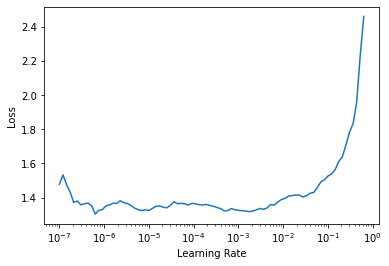

In [11]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,1.296702,0.910154,0.486239,0.477157,0.591195,00:30


Better model found at epoch 0 with valid_loss value: 0.910154402256012.


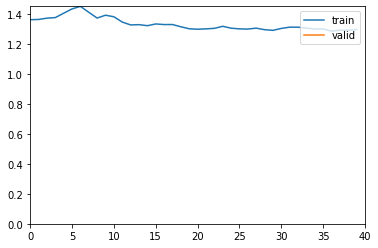

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,1.344464,0.977068,0.477064,0.469388,0.578616,00:32
1,1.304411,0.966712,0.463303,0.458647,0.575472,00:31
2,1.298243,0.965786,0.483180,0.475124,0.600629,00:31
3,1.303423,0.932529,0.477064,0.467742,0.547170,00:31
4,1.295356,0.923521,0.474006,0.466146,0.562893,00:31
5,1.281863,0.914210,0.500000,0.487671,0.559748,00:31
6,1.249857,0.911805,0.492355,0.480114,0.531447,00:31
7,1.253596,0.916132,0.496942,0.484765,0.550314,00:31
8,1.262197,0.903790,0.489297,0.477273,0.528302,00:31
9,1.252137,0.901847,0.477064,0.465116,0.503145,00:31


Better model found at epoch 0 with valid_loss value: 0.9770684838294983.


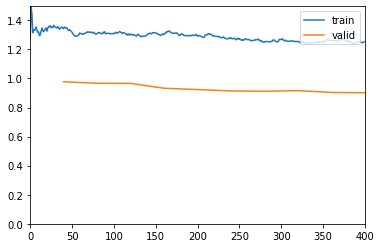

Better model found at epoch 1 with valid_loss value: 0.9667115807533264.
Better model found at epoch 2 with valid_loss value: 0.965785801410675.
Better model found at epoch 3 with valid_loss value: 0.9325289726257324.
Better model found at epoch 4 with valid_loss value: 0.9235214591026306.
Better model found at epoch 5 with valid_loss value: 0.9142101407051086.
Better model found at epoch 6 with valid_loss value: 0.911804735660553.
Better model found at epoch 8 with valid_loss value: 0.9037896394729614.
Better model found at epoch 9 with valid_loss value: 0.9018471837043762.


In [12]:
learn.fine_tune(10,base_lr=1e-5)

In [13]:
dbTest = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=GrandparentSplitter(valid_name='test'),
                 get_y=parent_label,
                 item_tfms = Resize(512),
                 batch_tfms=[*aug_transforms(size=256, min_scale=0.75), Normalize.from_stats(*imagenet_stats)])
dlsTest = dbTest.dataloaders(path,bs=32)

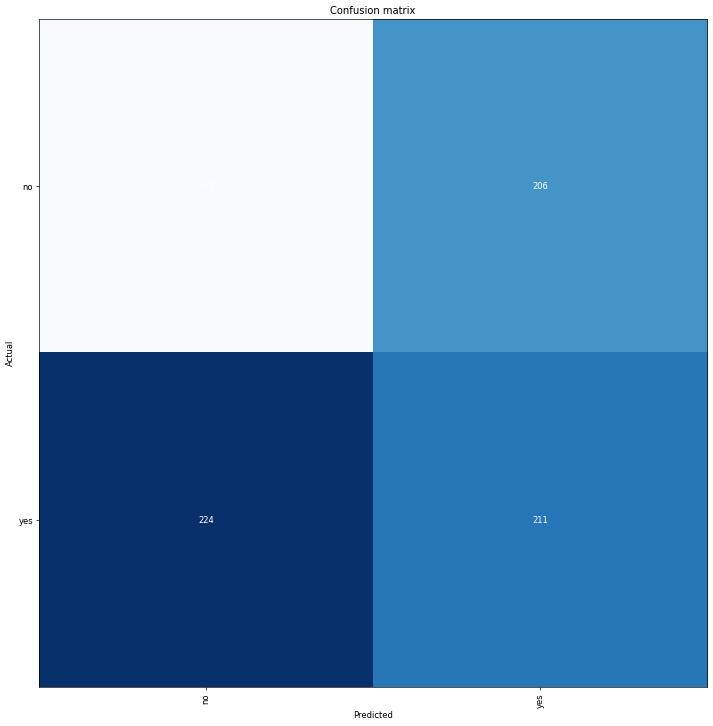

In [14]:
learn.dls = dlsTest
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12),dpi=60)

In [15]:
learn.validate()

Better model found at epoch 0 with valid_loss value: 0.47432762384414673.


(#4) [0.9713158011436462,0.47432762384414673,0.5059952038369304,0.4850574712643678]

In [16]:
learn.export(fname='resnet50.pkl')